## Prediction of telemtry data with ARIMA model
Using battery temperature data and ARIMA(5, 1, 0) model

[Source](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

In [1]:
# Import cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

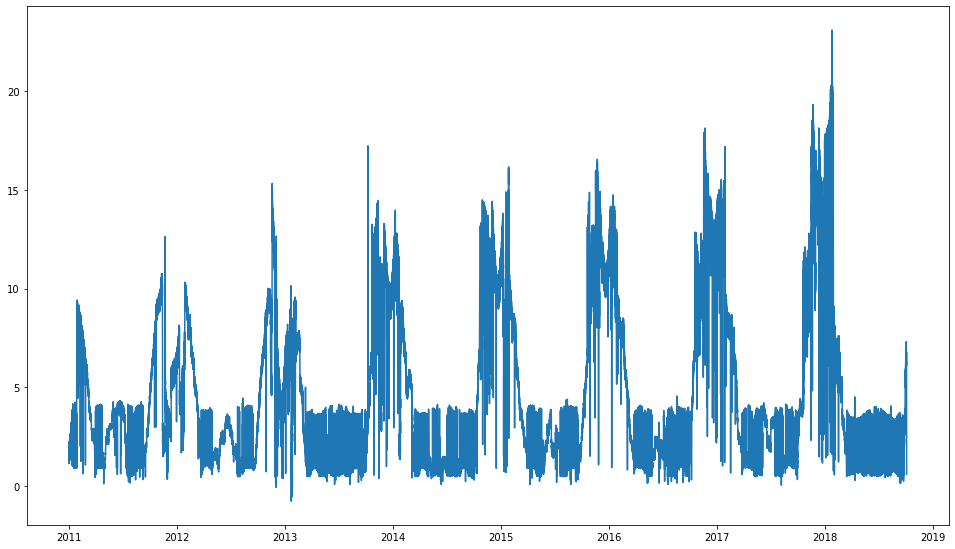

In [17]:
battery = pd.read_csv('./Data/BatteryTemperature.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
#busVolt.columns = ['Time', 'Bus Voltage']
battery = battery[60323:]
fig = plt.figure(figsize=(16, 9))
graph = fig.add_axes([0.1, 0.1, 0.8, 0.8])
graph.plot(battery)
plt.show()

In [11]:
model = ARIMA(battery, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/home/fatema/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/home/fatema/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
                               ARIMA Model Results                               
Dep. Variable:     D.Battery Temperature   No. Observations:                67965
Model:                    ARIMA(5, 1, 0)   Log Likelihood              -79908.352
Method:                          css-mle   S.D. of innovations              0.784
Date:                   Tue, 29 Sep 2020   AIC                         159830.704
Time:                           21:20:57   BIC                         159894.591
Sample:                       01-01-2011   HQIC                        159850.435
                

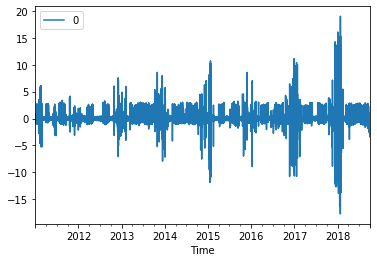

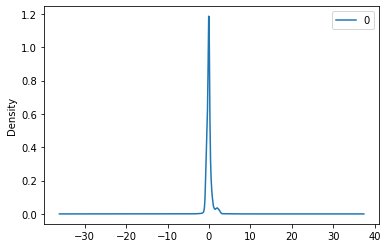

                  0
count  6.796500e+04
mean   1.616832e-07
std    7.841112e-01
min   -1.774106e+01
25%   -3.226348e-01
50%   -5.271025e-02
75%    1.630938e-01
max    1.901543e+01


In [12]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

expected=0.477905
predicted=0.691792, expected=1.671977
predicted=1.608630, expected=3.650047
predicted=3.215574, expected=3.195567
predicted=2.911180, expected=2.748838
predicted=2.214358, expected=2.433977
predicted=2.077465, expected=2.112137
predicted=2.504759, expected=1.829364
predicted=2.082110, expected=1.619056
predicted=1.815626, expected=1.303024
predicted=1.512125, expected=1.301239
predicted=1.442710, expected=0.991785
predicted=1.147211, expected=0.891165
predicted=1.032938, expected=0.891165
predicted=0.937093, expected=0.757037
predicted=0.889679, expected=0.477905
predicted=0.561396, expected=1.310009
predicted=1.208132, expected=3.687067
predicted=3.233670, expected=3.110707
predicted=2.874294, expected=2.663280
predicted=2.188729, expected=2.191962
predicted=1.746714, expected=1.842848
predicted=2.314470, expected=1.322658
predicted=1.640764, expected=1.222402
predicted=1.479020, expected=0.914547
predicted=1.146085, expected=0.709609
predicted=0.940217, expected=0.5

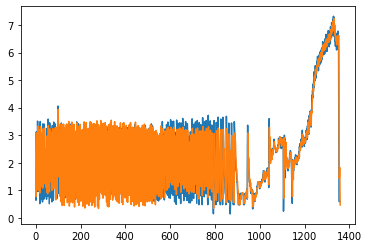

In [13]:
series = battery.values
split_time = int(len(series)*0.98)
#split_time = 50000
series_train, series_valid = series[:split_time], series[split_time:]
history = [x for x in series_train]
predictions = list()

for i in range(len(series_valid)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    out = model_fit.forecast()
    y_hat = out[0]
    predictions.append(y_hat)
    obs = series_valid[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (y_hat, obs))

mse = mean_squared_error(series_valid, predictions)
mae = mean_absolute_error(series_valid, predictions)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
plt.plot(series_valid)
plt.plot(predictions)
plt.show()

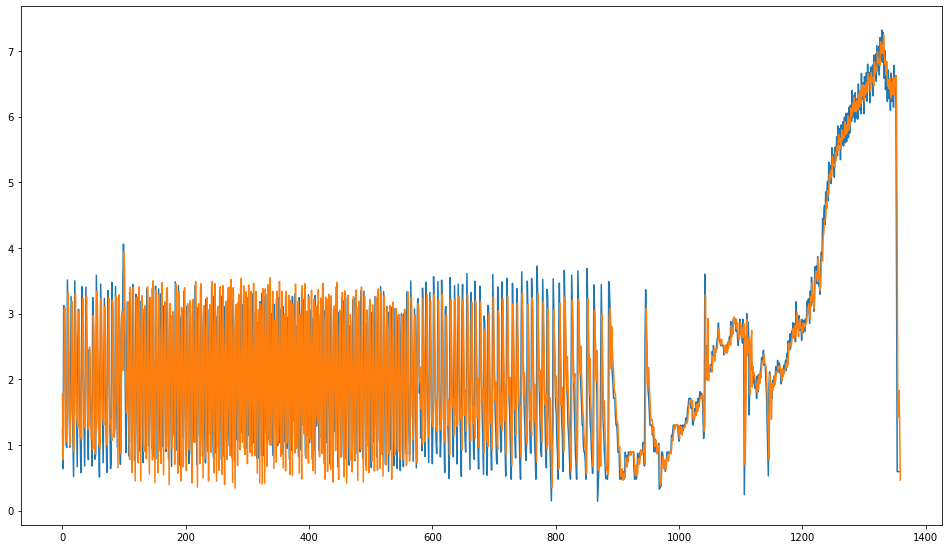

In [16]:
fig = plt.figure(figsize=(16, 9))
graph = fig.add_axes([0.1, 0.1, 0.8, 0.8])
graph.plot(series_valid)
graph.plot(predictions)
plt.show()